In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
pff = pd.read_csv('pff_pi.csv', index_col=0)
pff = pff.reset_index().drop(columns='index').reset_index().rename(columns={'index':'game_id'}).set_index('game_id')
pff = pff[['gamenum','Team', 'Opposing Team', 'Season', 'Week', 'Date', 'Time', 'H/A', 'W/L',
       'PA', 'PF', 'OVR', 'OFF', 'PASS', 'PBLK', 'RECV', 'RUN', 'RBLK', 'DEF',
       'RDEF', 'TACK', 'PRSH', 'COV', 'SPEC', 'OVR_opp', 'OFF_opp', 'PASS_opp',
       'PBLK_opp', 'RECV_opp', 'RUN_opp', 'RBLK_opp', 'DEF_opp', 'RDEF_opp',
       'TACK_opp', 'PRSH_opp', 'COV_opp', 'SPEC_opp']]
# pff.iloc[:,9:].drop(columns=['SPEC','SPEC_opp'])
s = pff['Date']
pff['Date'] = pd.to_datetime(s, infer_datetime_format=True) 

pff.tail(2)

,gamenum,Team,Opposing Team,Season,Week,Date,Time,H/A,W/L,PA,PF,OVR,OFF,PASS,PBLK,RECV,RUN,RBLK,DEF,RDEF,TACK,PRSH,COV,SPEC,OVR_opp,OFF_opp,PASS_opp,PBLK_opp,RECV_opp,RUN_opp,RBLK_opp,DEF_opp,RDEF_opp,TACK_opp,PRSH_opp,COV_opp,SPEC_opp
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7166,3583,San Francisco 49Ers,Seattle Seahawks,2019,17,2019-12-29,8:20pm,A,W,21,26,79.9,88.9,88.3,81.6,84.6,72.2,69.2,64.7,65.6,66.5,58.7,65.5,56.3,60.3,70.3,67.1,76.2,67.5,58.9,68.1,39.7,37.0,26.6,61.1,42.6,66.9
7167,3583,Seattle Seahawks,San Francisco 49Ers,2019,17,2019-12-29,8:20pm,H,L,26,21,60.3,70.3,67.1,76.2,67.5,58.9,68.1,39.7,37.0,26.6,61.1,42.6,66.9,79.9,88.9,88.3,81.6,84.6,72.2,69.2,64.7,65.6,66.5,58.7,65.5,56.3


In [3]:
team = 'San Francisco 49Ers'
stats = pff[pff['Team']==team].iloc[:,11:]
stats.tail(10)

,OVR,OFF,PASS,PBLK,RECV,RUN,RBLK,DEF,RDEF,TACK,PRSH,COV,SPEC,OVR_opp,OFF_opp,PASS_opp,PBLK_opp,RECV_opp,RUN_opp,RBLK_opp,DEF_opp,RDEF_opp,TACK_opp,PRSH_opp,COV_opp,SPEC_opp
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,
6889,80.2,76.5,56.2,68.2,77.1,65.2,77.1,76.4,48.5,44.4,70.7,85.5,47.9,53.1,50.4,28.8,66.1,52.9,76.8,59.6,62.1,52.1,77.9,67.4,68.4,62.2
6898,67.3,80.0,85.3,70.4,77.6,67.4,66.3,46.5,35.9,33.8,74.5,46.1,45.4,61.1,67.1,55.5,44.1,65.7,75.3,70.7,49.7,65.2,44.5,64.3,34.9,78.2
6951,74.1,54.1,43.0,59.5,61.9,56.3,53.4,90.8,87.3,65.4,78.9,87.6,68.3,66.5,59.3,55.6,60.0,62.9,55.8,56.6,69.1,68.4,42.6,72.9,64.1,64.7
6971,75.5,71.1,75.1,47.2,76.7,54.6,55.4,72.6,64.1,56.6,56.5,79.3,59.6,67.1,68.9,71.8,80.8,61.0,69.7,59.3,64.4,85.9,69.9,71.0,49.4,57.7
7005,85.9,77.6,79.8,73.6,72.5,62.5,71.5,80.2,76.0,75.6,76.6,78.2,73.1,53.6,51.1,41.3,68.3,50.1,55.8,64.2,59.3,56.4,58.0,68.0,56.8,70.5
7014,65.4,67.5,51.1,73.1,64.3,70.7,70.1,65.5,66.9,60.6,52.7,69.4,33.4,66.4,62.1,54.4,85.1,56.7,61.1,62.3,61.3,55.7,51.5,64.0,62.9,90.1
7054,79.6,79.5,81.6,77.9,77.4,81.5,52.3,72.7,77.4,29.6,63.4,67.2,47.5,69.9,73.8,78.0,68.6,73.2,57.7,59.2,52.9,66.7,55.3,61.5,43.7,69.1
7099,65.8,62.5,61.6,53.8,66.5,51.4,64.4,66.6,67.6,59.7,69.3,61.5,67.9,69.5,68.9,74.2,65.6,67.7,65.6,54.9,65.2,70.7,44.9,69.7,54.4,66.0
7109,79.8,74.2,65.3,66.1,74.8,82.8,54.1,71.5,67.1,55.9,64.3,71.1,67.2,69.8,72.6,69.3,74.4,73.2,58.6,62.4,62.4,56.8,75.2,79.1,53.5,55.6


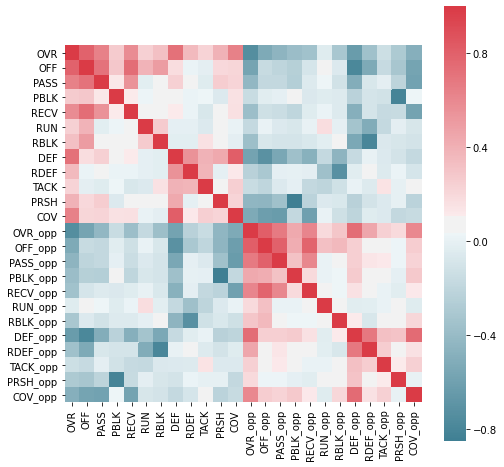

In [4]:
f, ax = plt.subplots(figsize=(8, 8))
corr = stats.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [5]:
# https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
corr = stats.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,OVR,OFF,PASS,PBLK,RECV,RUN,RBLK,DEF,RDEF,TACK,PRSH,COV,OVR_opp,OFF_opp,PASS_opp,PBLK_opp,RECV_opp,RUN_opp,RBLK_opp,DEF_opp,RDEF_opp,TACK_opp,PRSH_opp,COV_opp
OVR,1,0.79,0.64,0.27,0.58,0.24,0.33,0.72,0.35,0.23,0.4,0.64,-0.74,-0.53,-0.45,-0.39,-0.35,-0.042,-0.32,-0.63,-0.36,-0.13,-0.29,-0.49
OFF,0.79,1,0.71,0.28,0.74,0.39,0.5,0.17,0.016,-0.019,0.2,0.22,-0.57,-0.17,-0.2,-0.25,-0.09,0.092,-0.055,-0.78,-0.53,-0.17,-0.32,-0.57
PASS,0.64,0.71,1,0.13,0.56,-0.028,0.076,0.24,0.054,-0.04,0.26,0.22,-0.43,-0.18,-0.18,-0.26,-0.049,0.033,-0.11,-0.5,-0.078,-0.015,-0.21,-0.59
PBLK,0.27,0.28,0.13,1,0.11,0.025,0.064,0.09,0.016,0.031,-0.05,0.16,-0.16,-0.029,-0.013,0.096,-0.063,-0.037,-0.05,-0.23,-0.095,-0.11,-0.81,0.036
RECV,0.58,0.74,0.56,0.11,1,0.049,0.062,0.11,0.022,-0.075,0.094,0.16,-0.38,-0.12,-0.15,-0.2,-0.042,0.016,-0.049,-0.49,-0.095,-0.17,-0.16,-0.58
RUN,0.24,0.39,-0.028,0.025,0.049,1,0.26,-0.012,-0.01,-0.057,0.047,0.013,-0.17,0.015,-0.054,-0.074,0.0017,0.18,-0.0097,-0.34,-0.52,-0.18,-0.016,-0.083
RBLK,0.33,0.5,0.076,0.064,0.062,0.26,1,-0.026,-0.023,0.15,0.088,-0.017,-0.37,-0.075,-0.099,-0.095,-0.067,-0.024,0.084,-0.55,-0.8,-0.058,-0.08,-0.11
DEF,0.72,0.17,0.24,0.09,0.11,-0.012,-0.026,1,0.56,0.39,0.44,0.82,-0.58,-0.72,-0.55,-0.36,-0.48,-0.18,-0.45,-0.17,0.004,-0.056,-0.1,-0.18
RDEF,0.35,0.016,0.054,0.016,0.022,-0.01,-0.023,0.56,1,0.38,-0.0084,0.12,-0.24,-0.31,-0.012,-0.0034,-0.014,-0.36,-0.72,-0.035,0.042,-0.047,0.02,-0.09
TACK,0.23,-0.019,-0.04,0.031,-0.075,-0.057,0.15,0.39,0.38,1,0.049,0.25,-0.15,-0.2,-0.052,-0.0088,-0.18,-0.21,-0.12,0.012,-0.048,0.15,-0.0061,0.067


In [6]:
corr.iloc[0,0]

1.0

In [7]:
corr.loc["OFF","DEF"]

0.17487820669962736

In [8]:
corr.loc["OFF","DEF_opp"]

-0.7820324423837104